<h1 align="center"> Statistics and Financial Data Analysis </h1>




ARIMA Models
===

In [1]:
%reset -f

In [2]:
#import pandas_datareader as pd_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import math as m
import scipy as sp
from statsmodels.stats.anova import anova_lm
import pandas_datareader as pd_data

In [3]:
!pip install pmdarima
!pip install arch

In [4]:
# Importing the Time Series Analysis module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMAResults
from statsmodels.tsa.stattools import arma_order_select_ic
import statsmodels.tsa.stattools as sm_tools

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import pmdarima as pm
from datetime import datetime
# For splines
import patsy
from patsy import dmatrix
from arch import arch_model
from arch.univariate import ARX
from arch.univariate import GARCH
import pandas_datareader.data as web
import datetime as dt
import scipy.stats as st

In [5]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [6]:
# Will fix figure size for this notebook
plt.rcParams["figure.figsize"] = (8,6)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:

def plot_diagnosticsTight3(data,df):

    fig, ((ax1,ax2),(ax3,ax4), (ax5,ax6)) = plt.subplots(3,2,figsize=(10,10))

    ax1.hist(data, bins =40,color='m', density = True)
    mu = data.mean()
    sigma = data.std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 2419)
    ax1.plot(x, stats.norm.pdf(x, mu, sigma), linewidth= 5)
    ax1.grid()
    ax1.set_title("Hist Resid")

    ax2.plot(data)
    ax2.grid()
    ax2.set_title("Resid")

    fig = plot_acf(data,lags=40,zero=False, ax = ax3,use_vlines = True)
    ax3.grid()


    logData = np.floor(np.log(len(data)))
    ljbox_test = sm.stats.acorr_ljungbox(data,10,model_df=df)#package version issue

    ax4.plot(ljbox_test['lb_pvalue'])
    ax4.axhline(y=0.05, color='r',ls='--')
    ax4.set_title("LB test")
    ax4.grid()

    fig = sm.qqplot(data, line='q', ax = ax5)
    ax5.grid()

    ax6.plot(data*data)
    ax6.grid()
    ax6.set_title("Resid Sqr")

    plt.tight_layout()


Showing that given a lognormal process,
===
by construction the log difference is stationary
===

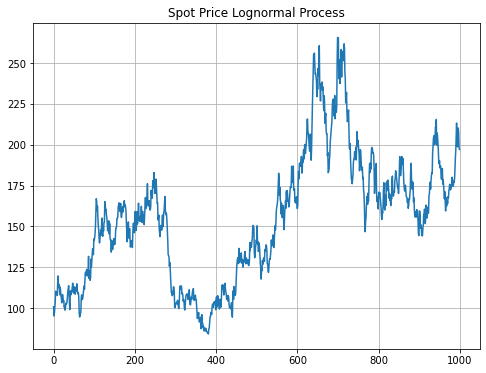

In [8]:
np.random.seed(17)
nSim = 1000
dt = 1/(nSim-1)

rw = np.zeros(nSim)
spotPrice = np.zeros(nSim)
spotPrice_0 = 100
mu_t = 0.1*dt
sqrt_dt = np.sqrt(dt)

for i in range(nSim):
    temp = np.random.normal()
    rw[i] = rw[i-1] + temp
    spotPrice[i] = np.exp(mu_t + sqrt_dt*rw[i])

spotPrice = spotPrice_0*spotPrice

plt.plot(spotPrice)
plt.title('Spot Price Lognormal Process')
plt.grid()
plt.show()

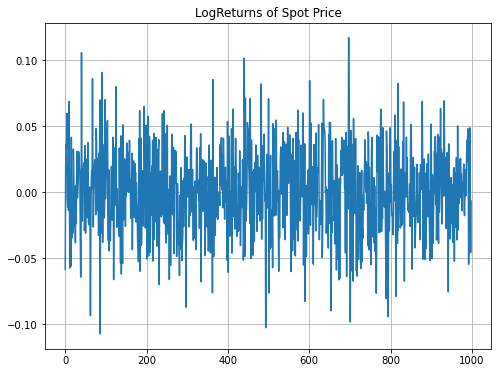

In [9]:
logRtnPrice = np.diff(np.log(spotPrice))
plt.plot(logRtnPrice)
plt.title('LogReturns of Spot Price')
plt.grid()
plt.show()

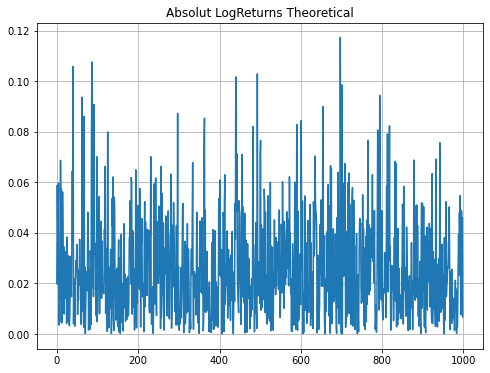

In [10]:
plt.plot(np.abs(logRtnPrice))
plt.title('Absolut LogReturns Theoretical')
plt.grid()
#plt.savefig("AbsValLogRtn")

In [11]:
from statsmodels.tsa.stattools import adfuller

test = adfuller(logRtnPrice)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:i/')
for item, value in test[4].items():
    print('\t%s: %.2f' % (item, value))

ADF Statistic: -32.801457
p-value: 0.000000
Critical Values:i/
	1%: -3.44
	5%: -2.86
	10%: -2.57


In [12]:
from statsmodels.tsa.stattools import kpss

test = kpss(logRtnPrice)
print('KPSS Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for item, value in test[3].items():
    print('\t%s: %.2f' % (item, value))

KPSS Statistic: 0.045718
p-value: 0.100000
Critical Values:
	10%: 0.35
	5%: 0.46
	2.5%: 0.57
	1%: 0.74


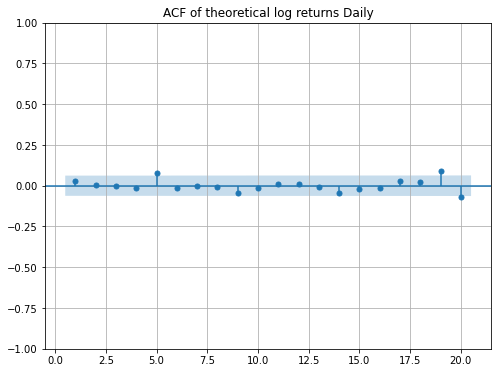

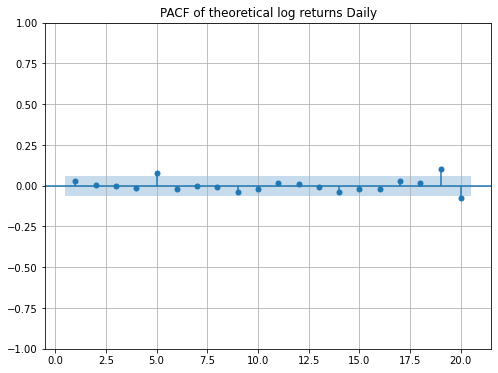

In [13]:
#Squared log returns don't have autocorrelation
#This is a proxty for squared residuals


y = logRtnPrice*logRtnPrice
plot_acf(y, lags = 20, zero = False)
plt.title('ACF of theoretical log returns Daily')
plt.grid()
plot_pacf(y, lags = 20, zero = False)
plt.title('PACF of theoretical log returns Daily')
plt.grid()
plt.show()

Finance Examples
===


In [14]:
# Selecting Copper ETF
JJCData = pd.read_csv("JJC.csv",index_col=0)
JJCData.head()

FileNotFoundError: [Errno 2] No such file or directory: 'JJC.csv'

In [ ]:
JJC = JJCData['JJC.Adjusted']
plt.plot(JJC)
plt.title('JJC Monthly Price')
plt.grid()
plt.show()

In [ ]:
# Usin ACF JJC
plot_acf(JJC, lags = 20, zero = False)
plt.title('ACF of JJC Daily')
plt.grid()
plot_pacf(JJC, lags = 20, zero = False)
plt.title('PACF of JJC Daily')
plt.grid()
plt.show()


In [ ]:
test = adfuller(JJC)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:i/')
for item, value in test[4].items():
    print('\t%s: %.2f' % (item, value))

In [ ]:
test = kpss(JJC)
print('KPSS Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for item, value in test[3].items():
    print('\t%s: %.2f' % (item, value))

Now consider taking the difference of log returns
===

In [ ]:
JJCLogRtn = np.log(JJC).diff().dropna()

In [ ]:
plt.plot(JJCLogRtn)
plt.title('JJC Daily Log Returns')
plt.grid()
plt.show()

In [ ]:
# Usin ACF JJC
plot_acf(JJCLogRtn, lags = 20)
plt.title('ACF of JJC Daily Log Returns')
plt.grid()
plt.show()

In [ ]:
# Using PACF JJC
plot_pacf(JJCLogRtn, lags = 20)
plt.title('PACF of JJC Daily Log Returns')
plt.grid()
plt.show()

In [ ]:
# Is the data staionary? It seems to reject the ADFuller test (that is, reject the presence of unit root)

test = adfuller(JJCLogRtn)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:i/')
for item, value in test[4].items():
    print('\t%s: %.2f' % (item, value))

In [ ]:
# Is the data staionary? It cannot reject KPSS test (support for stationarity)

test = kpss(JJCLogRtn)
print('KPSS Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for item, value in test[3].items():
    print('\t%s: %.2f' % (item, value))

In [ ]:
# Fit model to JJC data (as a test)
model = ARIMA(JJCLogRtn.values, order=(0,0,2))
MA2_res = model.fit()
print(MA2_res.summary());


Consider GS data
===

In [ ]:
import yfinance as yfin
yfin.pdr_override()

start_date = '2007-01-04'
end_date = '2019-11-04'
GSData = pd_data.data.get_data_yahoo('GS',start_date,end_date)
GSData.head()

GS = GSData['Adj Close']
GSLog = np.log(GS)
GSRtn = np.log(GS).diff().dropna()

In [ ]:
plt.plot(np.abs(GSRtn))
plt.title('Absolut LogReturns GS')
plt.grid()
#plt.savefig("AbsValLogRtnGS")

In [ ]:
# Test presence of unit root: seems to be rejected

test = adfuller(GSRtn)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for item, value in test[4].items():
    print('\t%s: %.2f' % (item, value))

In [ ]:
# Test stationarity: fails to reject hypothesis of stationarity, good candidate for ARMA model

test = kpss(GSRtn)
print('KPSS Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for item, value in test[3].items():
    print('\t%s: %.2f' % (item, value))

Given the data appears to be stationary,
===
need to determine the correct order for an ARMA model
===

In [ ]:
import pmdarima as pm
?pm.auto_arima

In [ ]:
GS.plot()
plt.grid()

In [ ]:
results = pm.auto_arima(GSRtn,start_p=1,
    d=None,
    start_q=1,
    max_p=3,
    max_d=2,
    max_q=3,
    seasonal=False,
    information_criterion='aic', trace = True)

In [ ]:
print(results.summary())

In [ ]:
#You can write your own Auto select ARIMA:

def auto_arima(data, max_p, max_d, max_q):
    resAIC = []
    order = []
    for p in range(max_p):
        for d in range(max_d):
            for q in range(max_q):
                try:
                    model = ARIMA(data, order=(p,d,q))
                    results = model.fit()
                    resAIC.append(results.aic)
                    order.append([p,d,q])
                    print('p=', p,'d=', d, 'q=', q, results.aic)
                except ValueError:
                    continue
    return [resAIC, order]

In [ ]:
auto_arima(GSRtn,4,1,4)

In [ ]:
model = ARIMA(GSRtn.values, order=(1,0,2))
ARMA_res = model.fit()
print(ARMA_res.summary());

In [ ]:
#Box Ljung test for the residuals
resid = ARMA_res.resid
print(resid)
ljbox_test_resid_ARMA = sm.stats.acorr_ljungbox(resid,10,model_df=3)
ljbox_test_resid_ARMA


In [ ]:
ljbox_test_resid_ARMA['lb_pvalue'][9]

In [ ]:
plot_diagnosticsTight3(resid,3)

In [ ]:
ARMA_res.params

Example with AEMO data for ARMA(1,1)
===

In [ ]:
# Retreiveing AEMO prices - retail prices of electricity

df3 = pd.read_csv('AEMOPriceDataSimple.csv', index_col = 0)
logprice = np.log(df3)

In [ ]:
plt.plot(logprice.values)
plt.grid()
plt.show()

In [ ]:
# Do something about outlier (it makes sense in this case)
percent_replace = 4.266077 # replace with quantile 99%
loc = logprice.idxmax()
logprice['RRP'][loc]=percent_replace

In [ ]:
plt.plot(logprice.values)
plt.grid()
plt.show()

In [ ]:
plot_acf(logprice.values, lags = 25, zero=False)
plt.title('ACF of AEMO log prices')
plot_pacf(logprice.values, lags = 25, zero=False)
plt.title('PACF of AEMO log prices')
plt.show()

In [ ]:
model = ARIMA(logprice.values, order=(1,0,1)) #Order of AR is 1, MA is 1.
AR1_MAl_res = model.fit()
print(AR1_MAl_res.summary());

In [ ]:
resid = AR1_MAl_res.resid
plot_diagnosticsTight3(resid,2)

In [ ]:
plot_acf(resid**2, lags = 40,zero =False)
plt.title('ACF of residuals sqr for AEMO ARMA(1,1)')
plt.show()
plot_pacf(resid**2, lags = 40,zero =False)
plt.title('PACF of residuals sqr for AEMO ARMA(1,1)')
plt.show()

Example with AEMO log returns data for ARMA(2,1)
===

In [ ]:
logprice_diff = logprice.diff().dropna().values
plt.plot(logprice_diff)
plt.grid()
plt.show()

In [ ]:
plot_acf(logprice_diff, lags = 40,zero =False)
plt.title('ACF of logprice_diff AEMO')
plt.show()
plot_pacf(logprice_diff, lags = 40,zero =False)
plt.title('PACF of logprice_diff AEMO')
plt.show()

In [ ]:
model = ARIMA(logprice.values, order=(2,0,1)) #Order of AR is 2, MA is 1.
AR2_MAl_res = model.fit()
print(AR2_MAl_res.summary());
resid = AR2_MAl_res.resid
plot_diagnosticsTight3(resid,3)

In [ ]:
import pmdarima as pm
model = pm.auto_arima(logprice_diff, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd', not relevant here.
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd', not relevant
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

Stationary Tests: Augmented Dickey-Fuller and KPSS
====

Let's start with some theoretical examples

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

Let's start with some theoretical processes and run the ADF and KPSS tests.

Stationarity Test for MA(3)
===

In [ ]:
# Test ADF for MA(3) model

ar1 = np.array([1])
am1 = np.array([1,0.8,0.6,0.6])
result1 = ArmaProcess(ar1, am1)
data_ar1 = result1.generate_sample(nsample=1000)
test = adfuller(data_ar1)
test

In [ ]:
test = adfuller(data_ar1)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:i/')
for item, value in test[4].items():
    print('\t%s: %.2f' % (item, value))

Hence we reject the hypothesis that the series has a unit root, or in other words, this series is stationary (as expected).

What about the KPSS method?

In [ ]:
test = kpss(data_ar1)
print('KPSS Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for item, value in test[3].items():
    print('\t%s: %.2f' % (item, value))

In this case, we cannot reject the null hypothesis that the process is stationary - as expected again!

Stationarity Test Random Walk
===

In [ ]:
np.random.seed(17)
nSim = 1000

rw = np.zeros(nSim)

for i in range(1, nSim):
    temp = np.random.normal()
    if ( temp < 0.):
        up_down = -1
    else:
        up_down = 1
    rw[i] = rw[i-1] + up_down

plt.plot(rw)
plt.grid()
plt.show()


In [ ]:
test = adfuller(rw)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:i/')
for item, value in test[4].items():
    print('\t%s: %.2f' % (item, value))

Hence we cannot reject the hypothesis that the series has a unit root (as expected).


In [ ]:
test = kpss(rw)
print('KPSS Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for item, value in test[3].items():
    print('\t%s: %.2f' % (item, value))

In this case, we reject the null hypothesis that the process is stationary - as expected again!